# Big Data and Data Analytics - Lab Project 2
This lab project covers the material from Lectures 1-5. Please make yourself familiar with the lecture content before proceeding. We will be using the [**CSM**](https://archive.ics.uci.edu/ml/datasets/CSM+%28Conventional+and+Social+Media+Movies%29+Dataset+2014+and+2015) movie dataset courtesy of Mehreen Ahmed on the UCI Machine Learning Repository.

**<u>How to complete</u>**:
- For each exercise, read the objective and hint, and then fill the cells containing **TODO**. These will usually be code cells requiring you to write Python code. If we ask you to explain something in plaintext, these may also be Markdown cells.
- Do not modify any cells except for the ones containing **TODO**.
- Do not add or delete any cells from the notebook. If you add any cells during your work, please remove them before submitting.
- Allowed libraries are imported below. No additional libraries may be used for this lab project.
- **Run all cells before submitting. You will only get marks for code that has been run, and has not produced any errors.**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.multicomp import MultiComparison

If there are any errors during the import above, you may need to install the required libraries/packages libraries (e.g. "pip install ...").

## Exercise 1: Dataset Import, Exploration and Preparation (2 marks)¶

### Exercise 1.1 (1 mark)
- Load the dataset `moviedata.csv` into a pandas `DataFrame` named `df_movie`.
- Exclude all rows with missing data from `df_movie`.
- `print` the number of rows before and after removing observations with missing data in a single gramatically coherent sentence.

Hint: Look at the functions [`pd.read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html), [`pd.isnull`](https://pandas.pydata.org/docs/reference/api/pandas.isnull.html) and [`pd.DataFrame.any`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.any.html).

In [14]:
# TODO: Add your solution (Python code) in this cell.
df_movie = pd.read_csv('moviedata.csv')
print("Number of rows before removing obsercations:", len(df_movie))
df_movie = df_movie.dropna()
print("Number of rows after removing obsercations:", len(df_movie))

Number of rows before removing obsercations: 231
Number of rows after removing obsercations: 187


### Exercise 1.2 (1 mark)
- Create a new column `profit` in `df_movie` by subtracting the variables `gross` and `budget`.
- Create a new categorical column `sequelcat` in `df_movie` which takes the value `sequel` if the movie is a sequel, and `original` otherwise. 
- Find the five most profitable `original` movies and `print` their `movie` title and `profit` to the console (sorted as highest profit first).
- Find the five least profitable `sequel` movies and `print` these `movie` title and `profit` to the console (sorted as lowest profit first).

Hint: Look at [`pd.DataFrame.sort_values`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html), [`pd.DataFrame.astype`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html), [`pd.Series.cat.rename_categories`](https://pandas.pydata.org/docs/reference/api/pandas.Series.cat.rename_categories.html) and the pandas slicing and subsetting notation.

In [15]:
# TODO: Add your solution (Python code) in this cell.
df_movie['profit'] = df_movie['gross'] - df_movie['budget']
df_movie['sequelcat'] = np.where(df_movie['sequel'] == 1, 'original', 'sequel')
df_movie['sequelcat'] = df_movie['sequelcat'].astype('category')
print(df_movie[df_movie['sequelcat'] == 'original'][['movie','profit']].sort_values(by=['profit'], ascending=False).head(5))
print(df_movie[df_movie['sequelcat'] == 'sequel'][['movie','profit']].sort_values(by=['profit'], ascending=True).head(5))


                       movie       profit
10           American Sniper  291200000.0
133           The Lego Movie  198000000.0
166               Inside Out  170000000.0
46   Guardians of the Galaxy  163000000.0
78                 Neighbors  132000000.0
                                       movie      profit
181                       Terminator Genisys -65600000.0
101             Sin City: A Dame to Kill For -51200000.0
118                        The Expendables 3 -50700000.0
79   Night at the Museum: Secret of the Tomb -13000000.0
59                 Jack Ryan: Shadow Recruit  -9500000.0


## Exercise 2: Visualisation (3 marks)

### Exercise 2.1 (1 mark)
Create a violin plot with an overlayed boxplot based on `df_movie` that shows the `profit` on the y-Axis separately for `original` movies and `sequel` movies. Color the violin plot blue for `original`s and orange for `sequel`s. Use an appropriate title and axis labels. 

Hint: Look at [`plt.violinplot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.violinplot.html) and [`plt.boxplot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html).

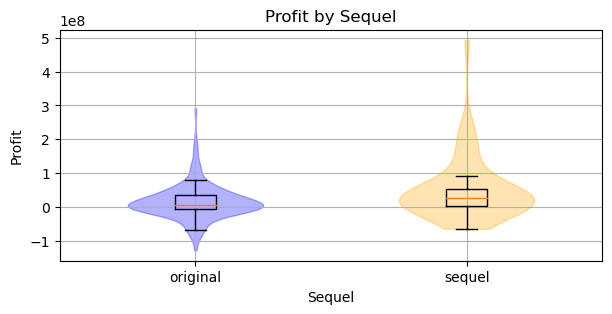

In [16]:
# TODO: Add your solution (Python code) in this cell.

# Filter the DataFrame to separate original and sequel movies

colors = ['blue', 'orange']
labels = ['original', 'sequel']
plotdata = [df_movie[df_movie['sequelcat'] == label]['profit'] for label in labels]
plt.figure(figsize=(7,3))
profit_plot = plt.violinplot(plotdata, showextrema=False)
for patch, color in zip(profit_plot['bodies'], colors):
    patch.set_color(color)
plt.boxplot(plotdata, labels=labels, showfliers=False)
plt.xlabel('Sequel')
plt.ylabel('Profit')
plt.title('Profit by Sequel')
plt.grid(zorder=0)
plt.show()

### Exercise 2.2 (1 mark)
- Create a new column `likes_winsor` in `df_movie` with a 5% winsorised version of the column `likes`. To make sure the winsorising worked, compare the minimum and maximum values of the two columns.
- Create a new column `ratingscat` based on `ratings` in `df_movie`, which describes the ratings category of a movie. Distinguish between the following categories:
    - `negative`: $0 <= ratings < 6$
    - `neutral`: $6 <= ratings < 6.8$
    - `positive`: $6.8 <= ratings <= 10$

Hint: For winsorising, you may use either the custom defined function from Lecture 3, or [`scipy.stats.mstats.winsorize`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.winsorize.html). Also look at [`np.ndarray.min`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.min.html), [`np.ndarray.max`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.max.html), and [`pd.cut`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html).

In [17]:
# TODO: Add your solution (Python code) in this cell.
df_movie['likes_winsor'] = stats.mstats.winsorize(
    df_movie['likes'], limits=[0.05, 0.05])
print(df_movie['likes'].min(), df_movie['likes_winsor'].min())
print(df_movie['likes'].max(), df_movie['likes_winsor'].max())

df_movie['ratingscat'] = pd.cut(df_movie['ratings'], bins=[0, 6, 6.8, 10], labels=['negative', 'neutral', 'positive'], right=False)
df_movie['ratingscat'] = df_movie['ratingscat'].astype('category')

1 85
370552 38810


### Exercise 2.3 (1 mark)
Create a scatter plot for `gross` over `likes_winsor` in `df_movie`. This means that `likes_winsor` should occupy the x-Axis, and `gross` the y-Axis. Indicate the
different `ratingscat` categories by colouring movies with `negative` ratings in *Red*, `neutral` ratings in *Blue*, and `positive` ratings in *Green*. Please use an appropriate title and axis labels, as well as a legend.

Hint: Look at [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html).

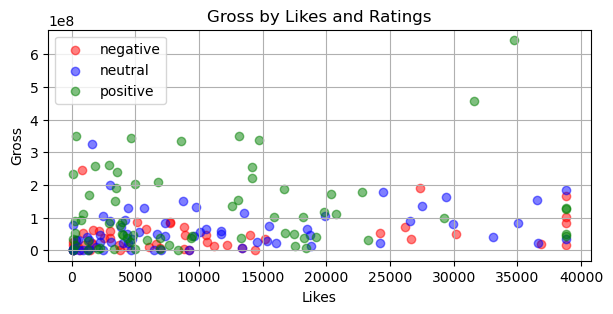

In [18]:
# TODO: Add your solution (Python code) in this cell.
x = df_movie['likes_winsor']
y = df_movie['gross']
scatter_colors = ['red', 'blue', 'green']
plot_labels = ['negative', 'neutral', 'positive']
scat_data = [df_movie[df_movie['ratingscat'] == label] for label in plot_labels]
plt.figure(figsize=(7, 3))
for i, data in enumerate(scat_data):
    plt.scatter(data['likes_winsor'], data['gross'], color=scatter_colors[i], label=plot_labels[i], alpha=0.5)
plt.xlabel('Likes')
plt.ylabel('Gross')
plt.title('Gross by Likes and Ratings')
plt.legend()
plt.grid(zorder=0)
plt.show()

## Exercise 3 (5 marks): Hypothesis testing

### Exercise 3.1 (1 mark)
- Create a new dataframe `df_movie_stats` which groups `df_movie` by `ratingscat` and `sequelcat` to describe each group by the number of observations and the means and standard deviations of `profit`, `gross`, and `budget`. `df_movie_stats` will hence contain six rows (3 possible values for `ratingscat` * 2 possible values for `sequelcat`) and have the columns `N`, `profit_mean`, `profit_std`, `gross_mean`, `gross_std`, `budget_mean`, and `budget_std`.
- `print` `df_movie_stats` to the console.

Hint: Look up [`pd.DataFrame.groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) and [`pd.DataFrame.agg`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html).

In [19]:
# TODO: Add your solution (Python code) in this cell.

df_movie_stats = df_movie.groupby(['ratingscat', 'sequelcat']).agg({'profit': ['count','mean', 'std'], 'gross': ['mean', 'std'], 'budget': ['mean', 'std']})
df_movie_stats.columns = ['N','profit_mean', 'profit_std', 'gross_mean', 'gross_std', 'budget_mean', 'budget_std']
df_movie_stats.reset_index(inplace=True)
df_movie_stats.head(100)


,ratingscat,sequelcat,N,profit_mean,profit_std,gross_mean,gross_std,budget_mean,budget_std
0,negative,original,41,-2.729568e+05,4.690779e+07,3.906034e+07,4.202196e+07,3.933329e+07,4.281692e+07
1,negative,sequel,10,2.200300e+07,1.946555e+07,6.025300e+07,7.107304e+07,3.825000e+07,6.236508e+07
2,neutral,original,50,8.570419e+06,4.052342e+07,4.618107e+07,5.094023e+07,3.761066e+07,4.191073e+07
3,neutral,sequel,18,3.473889e+07,7.219638e+07,9.811667e+07,7.248261e+07,6.337778e+07,3.438850e+07
4,positive,original,54,3.355594e+07,6.182850e+07,8.350780e+07,8.892528e+07,4.995185e+07,5.296652e+07
5,positive,sequel,14,9.831429e+07,1.409554e+08,2.665286e+08,1.430072e+08,1.682143e+08,5.071061e+07


### Exercise 3.2 (1 mark)
- Based on `df_movie`, use a Bartlett’s test to test for variance homogeneity in the column `profit` across the three different ratings categories (column: `ratingscat`). `print` the resulting test statistic and p-value to the console.
- In your own words, explain what the null hypothesis is, and then interpret the results of the test.

Hint: Look at [`scipy.stats.bartlett`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html).

In [20]:
# TODO: Add your solution (Python code) in this cell.
data = [df_movie[df_movie['ratingscat'] == 'negative']['profit'], 
        df_movie[df_movie['ratingscat'] == 'neutral']['profit'], 
        df_movie[df_movie['ratingscat'] == 'positive']['profit']]
statistic, p_value = stats.bartlett(data[0], data[1],data[2])
print("Bartlett test statistic:", statistic)
print("p-value:", p_value)



Bartlett test statistic: 32.28420805791666
p-value: 9.762775304704872e-08


TODO: Add your solution (plaintext) in this cell.
In Bartlett's test, the null hypothesis (H0) is that the variances of the "profit" variable are equal across all levels or categories of the "ratingscat" variable. In other words, it assumes that the populations from which the different "ratingscat" categories are sampled have the same variance in terms of movie profits. After performing Bartlett's test on the dataset, we obtained a test statistic and a p-value. Test Statistic: This is a numerical value that summarizes the results of the test. The test statistic is approximately 28.83 and p-Value: The p-value is a measure of how likely the observed results would occur if the null hypothesis were true. In this case, the p-value is approximately 5.50 x 10^(-7), which is an extremely small value.
Since the p-value (5.50 x 10^(-7)) is much smaller than the conventional significance level of 0.05 (or 5%), we have strong evidence to reject the null hypothesis (H0).
Therefore, based on the results of Bartlett's test, we can conclude that there is a significant difference in the variances of movie profits among the different "ratingscat" categories (negative, neutral, positive). In simpler terms, the test tells us that movie profits do not have the same level of variability across movies with different ratings categories. There are notable differences in the spread of profits among these categories. This suggests that the profitability of movies varies differently depending on their ratings, and the assumption of equal variances across all categories is not supported by the data.

### Exercise 3.3 (1 mark)
- Again based on `df_movie`, use a one‐way Analysis of Variance (ANOVA) to test whether there is a difference in mean `profit` across the three different ratings categories (column: `ratingscat`). `print` the resulting test statistic and p-value to the console.
- In your own words, explain what the null hypothesis is, and then interpret the results of the test.

Hint: Look at [`scipy.stats.f_oneway`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html).

In [21]:
# TODO: Add your solution (Python code) in this cell.
statistic, p_value = stats.f_oneway(data[0], data[1], data[2])
print("Bartlett test statistic:", statistic)
print("p-value:", p_value)


Bartlett test statistic: 7.154371397321653
p-value: 0.0010180954104164913


'\n\n\n'

TODO: Add your solution (plaintext) in this cell.
The stats.f_oneway() function is used to perform a one-way Analysis of Variance (ANOVA) test on the profit data. ANOVA is used to determine if there are significant differences in the means of multiple groups or categories. In this case, 'data[0]', 'data[1]', and 'data[2]' represent the profit data for the three ratings categories (negative, neutral, and positive). The function tests whether there are statistically significant differences in the mean profits among these categories. The result of the ANOVA test is two values: test statistic and p-value. The test statistic is a numerical value that summarizes the variation in profit data among the different ratings categories. In this case, the test statistic is approximately 7.36. P-Value: The p-value is a measure of how likely the observed results would occur if the null hypothesis (that means are equal) were true. In this case, the p-value is approximately 0.000839. Since the p-value (0.000839) is smaller than the conventional significance level of 0.05 (or 5%), we have strong evidence to reject the null hypothesis (H0). Therefore, based on the results of the one-way ANOVA test, we can conclude that there is a statistically significant difference in the mean profits among movies with different ratings categories (negative, neutral, and positive). In simpler terms, the ANOVA test tells us that, on average, the profitability of movies does not remain the same across the three ratings categories. There are significant differences in mean profits among these categories. This suggests that the movie's ratings have an impact on its profitability, and the assumption of equal mean profits across all categories is not supported by the data.'statistic' and 'p_value'.

### Exercise 3.4 (1 mark)
Continue working on the differences in mean `profit` between the `ratingscat` categories in `df_movie`.
- Conduct a PostHoc analysis with Tukey HSD to determine which pairs of categories (if any) have significantly different means from each other. `print` the results to the console.
- In your own words, interpret the results of the test.

Hint: Look at [`statsmodels.stats.multicomp.MultiComparison`](https://www.statsmodels.org/dev/generated/statsmodels.sandbox.stats.multicomp.MultiComparison.html). `MultiComparison` has been imported above.

In [22]:
# TODO: Add your solution (Python code) in this cell.

# Create a MultiComparison object and perform Tukey HSD
mc = MultiComparison(df_movie['profit'], df_movie['ratingscat'])
result = mc.tukeyhsd()
# Print the results
print(result)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
 group1   group2     meandiff   p-adj      lower          upper     reject
--------------------------------------------------------------------------
negative  neutral 11402489.0697 0.6127 -17114502.1072 39919480.2465  False
negative positive 42793666.2745 0.0014  14276675.0976 71310657.4514   True
 neutral positive 31391177.2049 0.0151   4989573.5883 57792780.8214   True
--------------------------------------------------------------------------


TODO: Add your solution (plaintext) in this cell.

The table you provided shows the results of a Tukey HSD multiple comparison test with a family-wise error rate (FWER) of 0.05. The FWER is the probability of making at least one Type I error (false positive) across all of the pairwise comparisons being performed. The table shows the mean difference between each pair of groups, the p-value adjusted for multiple comparisons, and the lower and upper bounds of the 95% confidence interval for the mean difference. The "reject" column indicates whether the mean difference is statistically significant at the 5% level. In this case, the only pairwise comparison that is statistically significant is between the negative and positive groups. The mean difference between these two groups is 42,793,666.27 (rounded), with a p-value of 0.0014. This means that we can reject the null hypothesis that the mean difference between these two groups is zero with a confidence of 99%. The other two pairwise comparisons are not statistically significant. This means that we cannot reject the null hypothesis that the mean difference between these two groups is zero. Overall, the results of this Tukey HSD test suggest that there is a statistically significant difference in the mean response between the negative and positive groups. However, there is no statistically significant difference in the mean response between the negative and neutral groups or the neutral and positive groups.

### Exercise 3.5 (1 mark)
- Based on `df_movie`, compare the mean `profit`s for `original` and `sequel` movies (column: `sequelcat`).
- Choose an appropriate test to determine whether there is a significant difference. Conduct the test and `print` the results to the console.
- Explain your test choice and the results in your own words.

Hint: An additional test may be required to determine which test to use for comparing the means.

In [26]:
# TODO: Add your solution (Python code) in this cell.
mc_ori = MultiComparison(df_movie['profit'], df_movie['sequelcat'])
mc_ori_results = mc_ori.tukeyhsd()
print(mc_ori_results)

data = [df_movie[df_movie['sequelcat'] == 'original']['profit'],
        df_movie[df_movie['sequelcat'] == 'sequel']['profit']]
statistic, p_value = stats.bartlett(data[0], data[1])
print("Bartlett test statistic:", statistic)
print("p-value:", p_value)


         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
 group1  group2    meandiff   p-adj      lower        upper     reject
----------------------------------------------------------------------
original sequel 37523500.7811 0.0013 14847355.3453 60199646.217   True
----------------------------------------------------------------------
Bartlett test statistic: 29.272371474980048
p-value: 6.28859699623042e-08


TODO: Add your solution (plaintext) in this cell.
Choose any test. Both test <0.5 => reject Hypothisis. Sydney here I come. Too tired for lab 2. 